In [1]:
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

# 01. EDA 및 전처리

In [2]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/Data/Market_Basket_Optimisation.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape
# 장바구니에 20개 한정

(7501, 20)

In [6]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2417,turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,energy bar,fromage blanc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4978,grated cheese,spaghetti,mineral water,chocolate,olive oil,french wine,cereals,antioxydant juice,green tea,pasta,fresh bread,white wine,cauliflower,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3749,spaghetti,mineral water,frozen smoothie,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5570,burgers,herb & pepper,ground beef,spaghetti,soup,cereals,french fries,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6042,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7060,eggplant,cookies,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4696,spaghetti,mineral water,hot dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,parmesan cheese,mineral water,champagne,white wine,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,mineral water,cake,cottage cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. 데이터 탐색

In [7]:
data.info()
# 20개 산 사람 1명

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [8]:
# 데이터 통계값
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


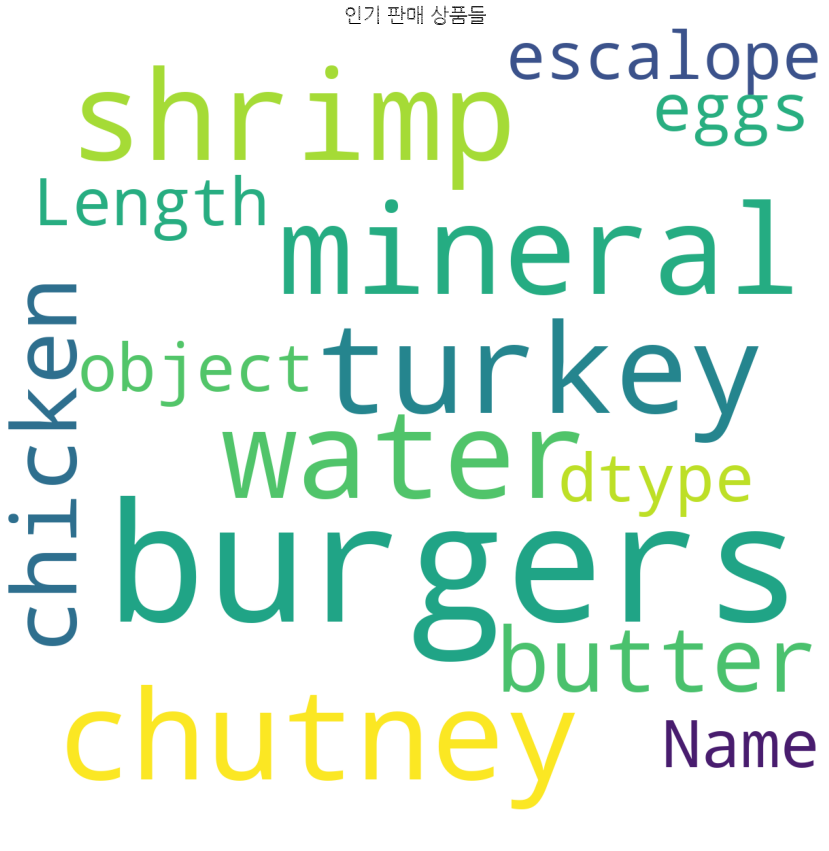

In [11]:
## 인기 판매 상품 시각화
# 워드 클라우드
plt.rcParams['figure.figsize']=(15,15)
wordcloud = WordCloud(background_color='white',width=1200,height=1200,max_words=121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize=20)
plt.show()

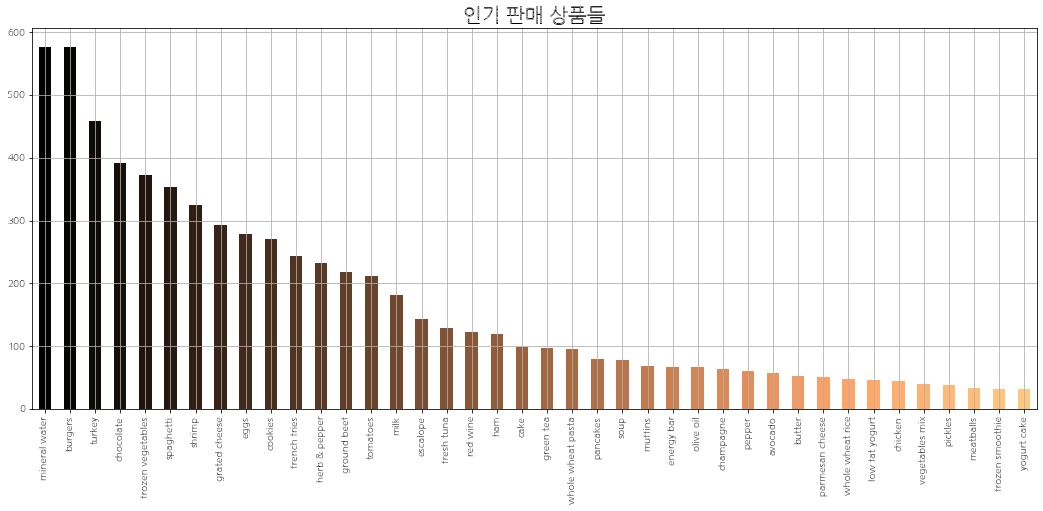

In [13]:
# 히트맵
plt.rcParams['figure.figsize']=(18,7)
color = plt.cm.copper(np.linspace(0,1,40))
data[0].value_counts().head(40).plot.bar(color=color)
plt.title('인기 판매 상품들',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [15]:
# 트리맵
y = data[0].value_counts().head(50).to_frame() #데이터프레임으로
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

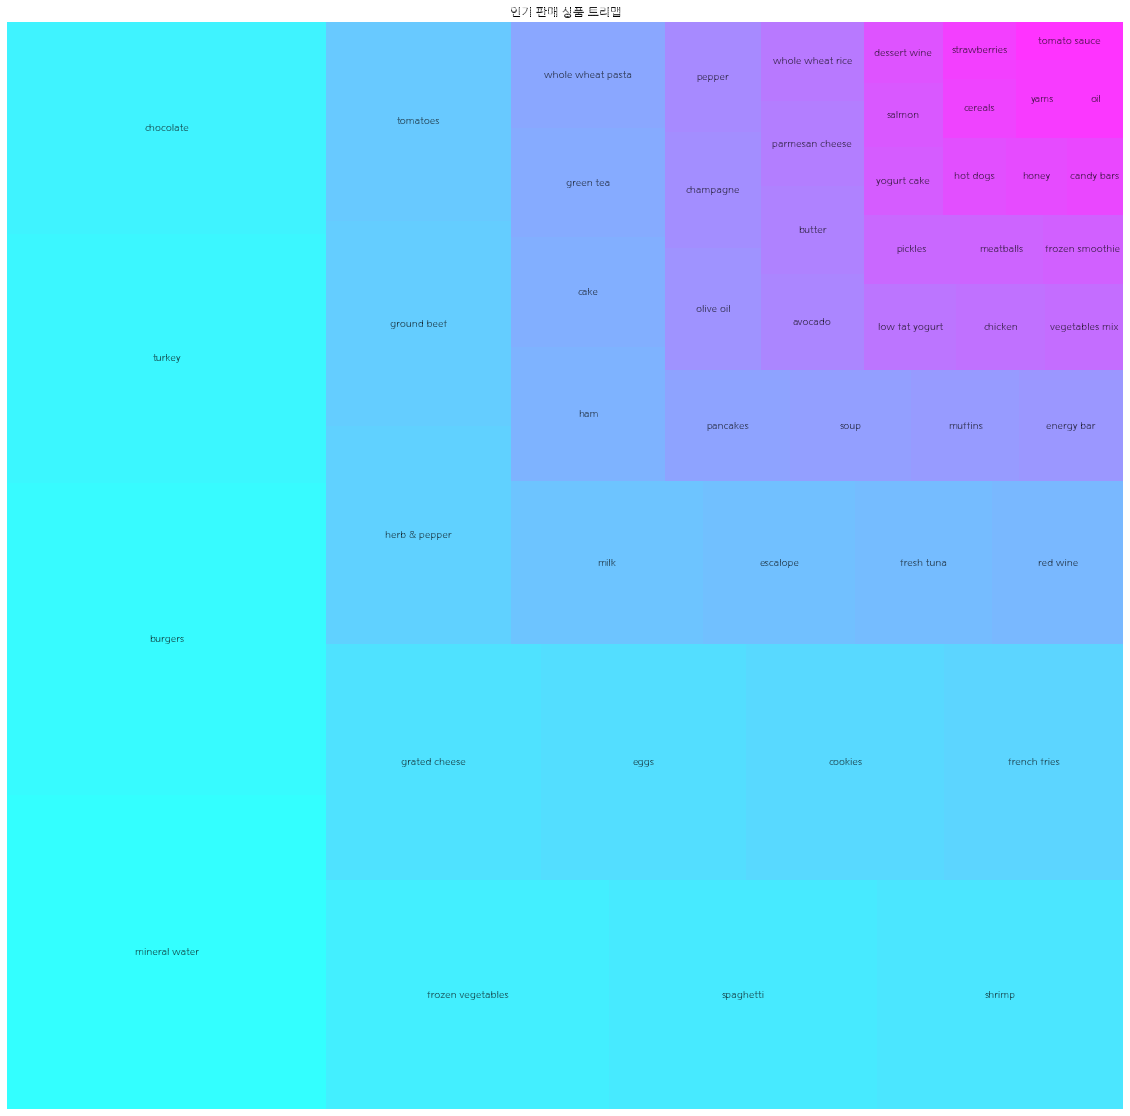

In [17]:
plt.rcParams['figure.figsize']=(20,20)
color = plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values, label=y.index, alpha=.8, color=color)
plt.title('인기 판매 상품 트리맵')
plt.axis('off')
plt.show()

## 2. 데이터 전처리

### 1) 데이터 컬럼명 수정

In [18]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
trans = []
for i in range(0,7501):
  trans.append([str(data.values[i,j]) for j in range(0,20)])

# numpy array로 변환
trans = np.array(trans)
print(trans.shape)

(7501, 20)


### 2) Transaction Encoder 적용

In [22]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [23]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [24]:
# 기존 컬럼 대상으로 필터링, 상위 50개만
len(y.index)

50

In [26]:
data = data[y.index]

# 03. 연관 규칙 분석

* 지지도 (support)
> 항목에 대한 거래수 / 전체 거래수
* 신뢰도 (confidence)
> 조건과 결과 항목을 동시에 포함하는 거래수 / 조건 항목을 포함한 거래수
* 향상도 (lift)
> lift(C,A) = support(C->A) / (support[A] * support[C]) = confidence(C->A) / support(A)
* 예) 거래1 : (A,B,C) / 거래2 : (A,C) / 거래3 : (A,D) / 거래4 : (E,F,G) 일 때,
> lift(C,A) = (2/2)/(3/4) = 1.3333

### 1) APriori 알고리즘 적용 절차

##### 1. 모든 거래에서 발생하는 모든 항목에 대한 빈도 테이블 생성

In [27]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,dessert wine,hot dogs,honey,candy bars,cereals,strawberries,yams,oil,tomato sauce
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###### 2. support가 임의의 값보다 큰 것들로 필터링
###### 3. 중요 항목의 모든 가능한 조합을 만들기

In [28]:
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
0,0.238368,(mineral water)
8,0.179709,(eggs)
5,0.174110,(spaghetti)
10,0.170911,(french fries)
3,0.163845,(chocolate)
...,...,...
135,0.010265,"(spaghetti, red wine)"
106,0.010132,"(chocolate, soup)"
218,0.010132,"(mineral water, eggs, ground beef)"
125,0.010132,"(low fat yogurt, frozen vegetables)"


##### 4. 모든 조합의 발생 횟수 계산

In [29]:
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(mineral water, eggs, ground beef)",3
219,0.013065,"(mineral water, eggs, milk)",3
220,0.011065,"(mineral water, ground beef, milk)",3
221,0.010532,"(chocolate, spaghetti, eggs)",3


In [30]:
frequent_itemsets[(frequent_itemsets['length']==3)&
                  (frequent_itemsets['support']>=0.01)]

,support,itemsets,length
206,0.015865,"(mineral water, chocolate, spaghetti)",3
207,0.013465,"(mineral water, chocolate, eggs)",3
208,0.010932,"(mineral water, chocolate, ground beef)",3
209,0.013998,"(mineral water, chocolate, milk)",3
210,0.011998,"(mineral water, spaghetti, frozen vegetables)",3
211,0.011065,"(mineral water, frozen vegetables, milk)",3
212,0.014265,"(mineral water, spaghetti, eggs)",3
213,0.010132,"(mineral water, spaghetti, french fries)",3
214,0.017064,"(mineral water, spaghetti, ground beef)",3
215,0.015731,"(mineral water, spaghetti, milk)",3


In [31]:
frequent_itemsets[(frequent_itemsets['length']==2)&
                  (frequent_itemsets['support']>=0.01)]

,support,itemsets,length
47,0.024397,"(burgers, mineral water)",2
48,0.019197,"(turkey, mineral water)",2
49,0.052660,"(mineral water, chocolate)",2
50,0.035729,"(mineral water, frozen vegetables)",2
51,0.059725,"(mineral water, spaghetti)",2
...,...,...,...
201,0.011865,"(pancakes, cake)",2
202,0.016398,"(pancakes, green tea)",2
203,0.011865,"(green tea, chicken)",2
204,0.011199,"(green tea, frozen smoothie)",2


In [33]:
frequent_itemsets[(frequent_itemsets['length']==1)&
                  (frequent_itemsets['support']>=0.1)]

,support,itemsets,length
0,0.238368,(mineral water),1
3,0.163845,(chocolate),1
5,0.174110,(spaghetti),1
8,0.179709,(eggs),1
10,0.170911,(french fries),1
14,0.129583,(milk),1
20,0.132116,(green tea),1


### 2) Association Rules 적용

In [34]:
df_ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
df_ar.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
298,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
306,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
260,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
272,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
30,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
...,...,...,...,...,...,...,...,...,...
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
237,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,0.003282,1.028201
303,(milk),"(mineral water, eggs)",0.129583,0.050927,0.013065,0.100823,1.979774,0.006466,1.055491
35,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851
